In [ ]:
# oCR 프로그램

1. tesseract_oct 프로그램 설치하기(언어에 한국어 추가하기)
2. 파이썬에서 사용할 수 있도록 pytesseract 패키지 설치하기
3. 


In [1]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.1-py2.py3-none-any.whl size=13379 sha256=fefd82940175a907035f25b273bd97b6081f03fb738ac1d095b58b031b8339d7
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\01\84\d2\10729e740ad8f5c5d3b02d10c7f15afeaa390f7723bd59dbd7
Successfully built pytesseract


In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imshow(tit, image):
    plt.title(tit)
    if image.shape == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
        
    plt.show()

# 1. 영어 test 에 적용

## 1.1  apative threshold를 적용한 ocr image

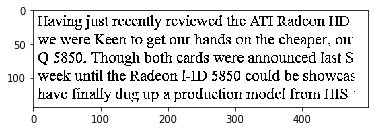

True

In [29]:
img = cv2.imread('./images/ocr.png', 0)

binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 21,5)
imshow('', binary)

cv2.imwrite('./images/ocr_text.png', binary)

## 1.2. ocr 프로그램으로 인식하기

In [31]:
import pytesseract

# 환경변수 설정을 안했기 때문에 위치를 지정해줘야 함.
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR/tesseract.exe'

str_binary = pytesseract.image_to_string('./images/ocr_text.png')
str = pytesseract.image_to_string('./images/ocr.png')



In [32]:
str

'Having just recently reviewed the ATI Radeo\nwe were Keen to get our hands on the cheape\nQ 5850. Though both cards were announced\nweek until the Radeon 1-ID 5850 could be she\nhave finally dug up a production model from'

In [33]:
str_binary

'Having just recently reviewed the ATI Radeon HD\n\nwe were Keen to get our hands on the cheaper, ou\nQ 5850. Though both cards were announced last S\nweek until the Radeon 1-ID 5850 could be showcas\nhave finally dug up a production model from HIS :'

# 2. 영수증에 적용하기

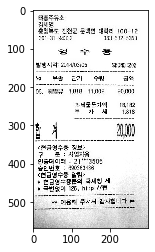

In [41]:
img = cv2.imread('./images/bill.jpg', 0)

imshow('', img)

In [42]:
import pytesseract

# 환경변수 설정을 안했기 때문에 위치를 지정해줘야 함.
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR/tesseract.exe'

str = pytesseract.image_to_string('./images/bill.jpg')



In [39]:
from pprint import pprint
pprint(str)

('HERA\n'
 '\n'
 '= AR BP ee] 100-12\n'
 '1-94332 043-532-5353\n'
 '\n'
 's+ =s=\n'
 'WBA: 2014/03/05\n'
 '\n'
 ' \n'
 ' \n'
 '\n'
 ' \n'
 '\n'
 ' \n'
 '\n'
 '2MIBB7IY — 19,182\n'
 'oF wd 1,818\n'
 '\n'
 ' \n'
 '\n'
 '<PaStS BH\n'
 'pe MINS\n'
 'SIBcHO|EY = 21***3506\n'
 'Seis : 690363486\n'
 'asses ep\n'
 '\n'
 '* + Bags See ae\n'
 'GIO] 126,')


# 3. 카드에 적용하기

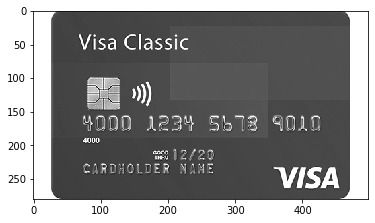

In [44]:
img = cv2.imread('./images/card1.png', 0)

imshow('', img)

In [46]:
str = pytesseract.image_to_string('./images/card1.png')
print(str)

NIKE M@E LSI (e

ed »))}
on BS So me Oe)
cn eae)

CARDHOLDER NAHE VISA


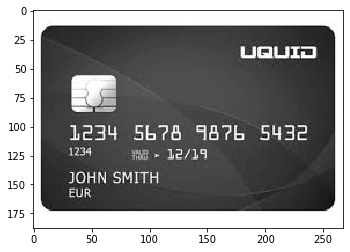

In [52]:
img = cv2.imread('./images/card3.jpg', 0)

imshow('', img)

In [53]:
str = pytesseract.image_to_string('./images/card3.jpg')
pprint(str)

'[ey- TE =)\n\n&\n\naE el de-N eb lod\n\nrar) SET b\n\nJOHN SMITH\ners'


- 그냥 하면 성능이 안좋음! binary처리해서 넣어야 성능이 좋아짐

# 4. 한글 인식하기


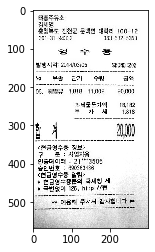

In [55]:
img = cv2.imread('./images/bill.jpg', 0)

imshow('', img)

In [57]:

str = pytesseract.image_to_string('./images/bill.jpg', 'kor')
pprint(str)


('태흥주유소\n'
 '\n'
 "도 진천군 문백면 태락리 100-12'\n"
 '1-94332         043-532-5353\n'
 '\n'
 '원 수 조\n'
 '발행시각: 2014103105\n'
 '\n'
 ' \n'
 ' \n'
 '\n'
 ' \n'
 '\n'
 ' \n'
 '\n'
 '과세물품가액  18.182\n'
 '부 가 세  1818\n'
 '\n'
 ' \n'
 '\n'
 '<현금영수중 정보?\n'
 '\n'
 '구 분 : 사업자용\n'
 '인증데이터 : 21***3506\n'
 '승인번호 : 690363486\n'
 '<뻔글영수중 알림>\n'
 '\n'
 '* * 협금영수중룬의: 극서점\n'
 '번없이 126,')


> 인식을 좋게 하려면
- 전체 영수증과 배경을 분리하는 threshold
- 영수증 내 글자와 배경을 분리하는 threshold를 처리해서 binary해서 할 수 있음.

> OCT 인식률
- 영어 > 한자 > 한글
- 한글: ㅏ의 뾰족 튀어나온 부분을 노이즈 처리해서 글자 이닛기 달맂ㅁ.